In [58]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Importing Training Dataset

In [2]:
train_data = pd.read_csv('E:\\DataScience\\Phyton\\ml\\DecisionTrees\\RandomForests\\Census_income_train.csv')
train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
train_data.shape

(32560, 15)

In [4]:
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

# Removing Missing Values marked as '?'

In [8]:
clean_train_data = train_data[train_data['Workclass'].str.contains('\?') == False]
clean_train_data.shape

(30724, 15)

In [9]:
clean_train_data = clean_train_data[clean_train_data['Occupation'].str.contains('\?') == False]

In [11]:
clean_train_data.shape

(30717, 15)

In [12]:
clean_train_data = clean_train_data[clean_train_data['Native-country'].str.contains('\?') == False]

In [13]:
clean_train_data.shape

(30161, 15)

# Get Dummies

In [14]:
train_dummies = pd.get_dummies(clean_train_data, drop_first = False)
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
train_dummies = train_dummies.drop(['Income_ >50K'], axis = 1)
train_dummies

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
32556,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32557,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
32558,22,201490,9,0,0,20,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [20]:
train_input = train_dummies.iloc[:,:-1]
train_target = train_dummies.iloc[:,-1]

In [21]:
train_input.shape

(30161, 103)

# Importing Test Dataset

In [22]:
test_data = pd.read_csv('E:\\DataScience\\Phyton\\ml\\DecisionTrees\\RandomForests\\Census_income_test.csv')
test_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [23]:
test_data.shape

(16281, 15)

In [24]:
test_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

# Removing Missing Values marked as '?'

In [25]:
clean_test_data = test_data[test_data['Workclass'].str.contains('\?') == False]
clean_test_data.shape

(15318, 15)

In [26]:
clean_test_data = clean_test_data[clean_test_data['Occupation'].str.contains('\?') == False]

In [27]:
clean_test_data.shape

(15315, 15)

In [28]:
clean_test_data = clean_test_data[clean_test_data['Native-country'].str.contains('\?') == False]

In [29]:
clean_test_data.shape

(15060, 15)

# Get Dummies

In [30]:
test_dummies = pd.get_dummies(clean_test_data, drop_first = False)
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [33]:
test_dummies = test_dummies.drop(['Income_ >50K.'], axis = 1)
test_dummies

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,245211,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
16276,39,215419,13,0,0,36,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
16278,38,374983,13,0,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
16279,44,83891,13,5455,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [34]:
test_input = test_dummies.iloc[:,:-1]
test_target = test_dummies.iloc[:,-1]

In [35]:
test_input.shape

(15060, 103)

# Decision tree

In [52]:
clf = tree.DecisionTreeClassifier(random_state = 65, ccp_alpha = 0.001)

In [53]:
clf =clf.fit(train_input, train_target)

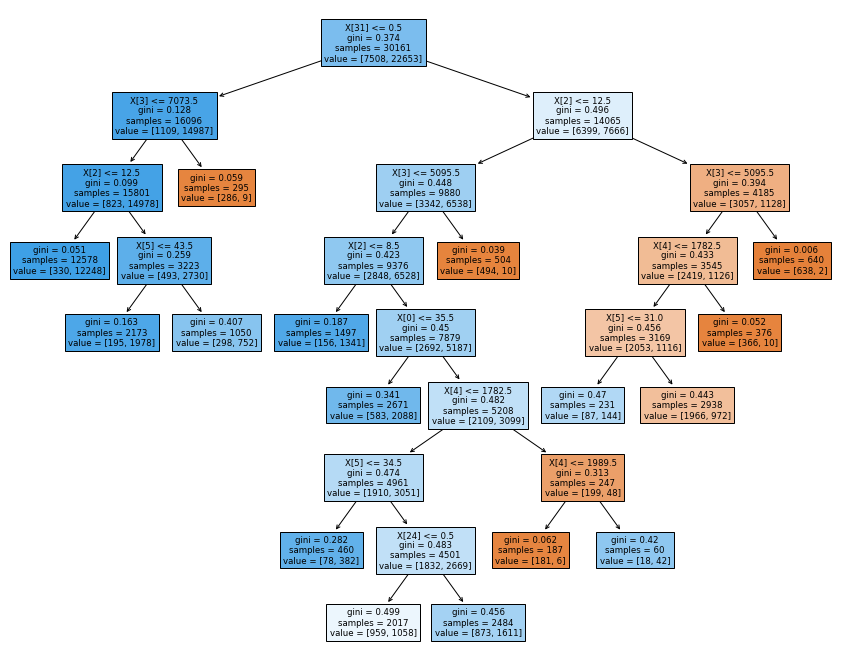

In [54]:
plt.figure(figsize = (15,12))
tree.plot_tree(clf, filled = True)
plt.show()

# Accuracy

In [55]:
test_target_pred = clf.predict(test_input)

In [56]:
print(classification_report(test_target, test_target_pred))

              precision    recall  f1-score   support

           0       0.79      0.51      0.62      3700
           1       0.86      0.96      0.90     11360

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



# Random Forest

In [59]:
clf = RandomForestClassifier(random_state = 65)

In [60]:
clf =clf.fit(train_input, train_target)

# Accuracy

In [61]:
test_target_pred = clf.predict(test_input)

In [62]:
print(classification_report(test_target, test_target_pred))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      3700
           1       0.88      0.92      0.90     11360

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060

